# PROJECT 1 MARKET BASKET ANALYSIS
 # Step by step approach

# The first thing to do would be to import our libraries. This would help us in exploring, analyzing and visualising our data.

The first library we would be importing would be
- Pandas: data preprocessing, data manipulation and analysis. it offers data structure for manipulating data tables and time series.
- Numpy: Numerical Python:it is a python library used for working with arrays,it also has function for working in linear algebra domain and matrices.
- Seaborn: it is an open source python library based on python library called matplotlib used for data exploration and visualization, with dataframes and pandas library seaborn functions easily for python and numpy, matplotlib is a cross platform for data visualisation and GUI.
- matplotlib.pyplot: Also required for plotting
# Data Exploration
In this stage, we check our data for missing/null values, we observe the data type. In the process of exploring and cleaning, I did a datatype conversion for the Date column from object to the expected datetime.
# Data Analysis
Next thing I did was to work on the item distribution. I grouped it based on its freqeuncy and represented it in a barchart, for just top 10 items.
# Data Visualisation
The date indexing which followed was done so as to understand items sold and amount monthly in order to record increase or decrease. This was graphically represented using a line chart. At this point, I was done with data exploration, data analysis and data visualisation. 
# Data Modelling
Next thing to do was Data modelling. This is a crucial step in database design process because it ensures that data is organized, accurate and aligned with business needs facilitating effective communication among stakeholders.

In [23]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
marketing= pd.read_csv(r"C:\Users\PRAISE\Desktop\100DaysPython\Flit Utiva challenge\MarketBasketAnalysis.csv")
marketing.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
marketing.info()#gives info on the dataset, tells you the datatype. 
#it gives concise summary of the dataframe, 
#it comes handy for exploratory analysis of the data to get a quick overview of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [4]:
marketing.isnull().sum().sort_values(ascending= False) 
#isnull() used to check for empty columns or rows/null values in our dataset.
#.sum() calculates the sum of elements for each row and column, 
#the returning values might be True= 1 or False =0 counting the number of values in each row acting on the result of isnull()
#.sort_values is used for sorting the values in ascending or descending order

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [5]:
#Data type conversion:From our exploration, it was observed that datatype for all columns from the dataset is in object and int.
#The expected data type for date is datetime so we would need to convert fron object to datetime
marketing['Date']= pd.to_datetime(marketing['Date'])
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


C:\Users\PRAISE\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-07-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\PRAISE\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-09-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\PRAISE\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-02-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\PRAISE\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-12-2015' in DD/MM/YYYY format. Provide format or sp

In [6]:
marketing.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


using groupby, I was able to group every item sold against the frequency(number sold) and sorted the values from highest to lowest, .reset_index is used to rearrange the index numbering.
After that, I made a barchart of top 10 items sold using numpy and matpoltlib.

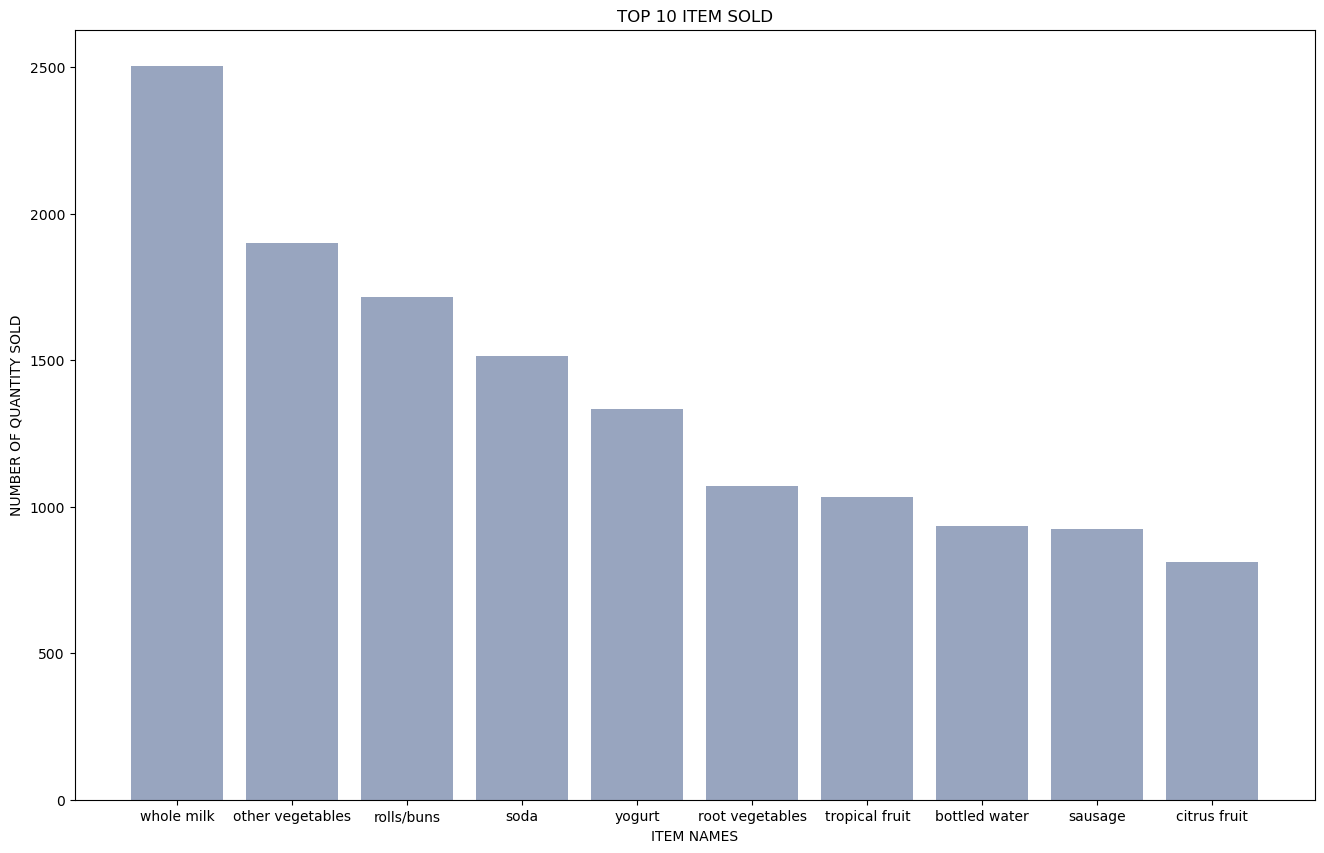

In [7]:
Item_distro= marketing.groupby(by= 'itemDescription').size().reset_index(name= 'Frequency').sort_values(by= 'Frequency', ascending= False).head(10)

bars= Item_distro['itemDescription']
height= Item_distro['Frequency']
x_pos= np.arange(len(bars))

plt.figure(figsize=(16,10))

plt.bar(x_pos, height, color= (0.2, 0.3, 0.5, 0.5))
plt.title('TOP 10 ITEM SOLD')
plt.xlabel('ITEM NAMES')
plt.ylabel('NUMBER OF QUANTITY SOLD')
plt.xticks(x_pos, bars)

plt.show()

In [8]:
#Next thing would be to set an index using the date column
marketing_date= marketing.set_index(['Date'])
marketing_date

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk
...,...,...
2014-08-10,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


[Text(0.5, 0, 'date'), Text(0, 0.5, 'number of item sold')]

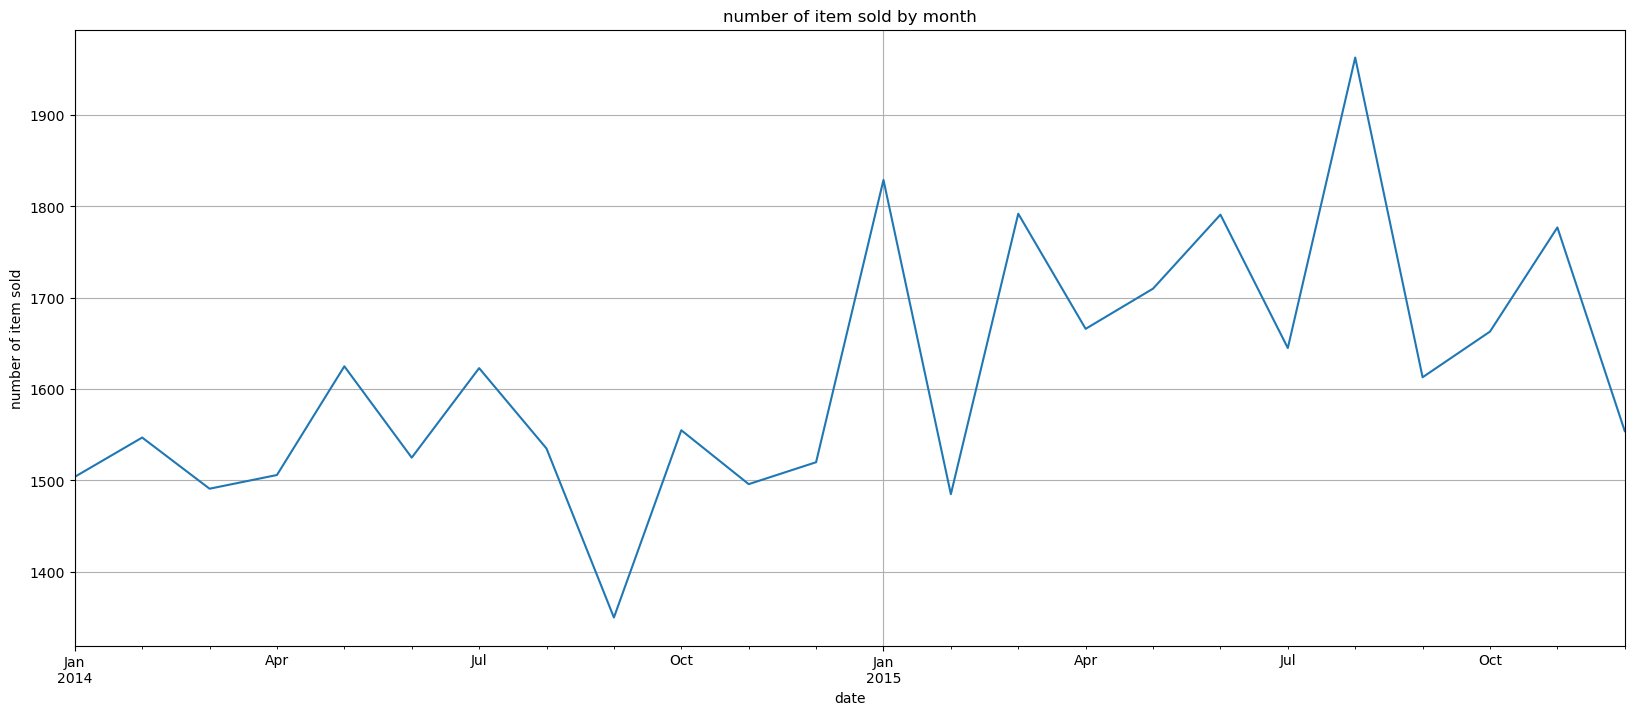

In [9]:
marketing_date.resample('M')['itemDescription'].count().plot(figsize=(20, 8),
    grid= True, title= 'number of item sold by month').set(xlabel='date', ylabel= 'number of item sold')

Data modelling,selecting the required variable and removing white spaces present.
Data modelling involves defining and organizing data requirements, needed to support business processes within a system. Basically, it is structuring data to visualise how it is stored, accessed and managed in a database.

In [10]:
cust_level= marketing[['Member_number', 'itemDescription']].sort_values(by= 'Member_number', ascending= False)
cust_level['itemDescription']= cust_level['itemDescription'].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [11]:
#combine all the items in the list for each customer
transactions= [a[1]['itemDescription'].tolist()
for a in list(cust_level.groupby(['Member_number']))]

Installing the apyori package
The apyori package is a python library used for performing association rule mining, a technique in data mining that discovers relationships, patterns, associations or correlations among a set of items in large datasets. Association rule mining is often applied to transactional datasets such as market basket analysis.

In [ ]:
#!pip install apyori

In [12]:
#importing a priory package for model creation
from apyori import apriori
rules= apriori(transactions= transactions, min_support= 0.002, min_confidence = 0.05, min_lift =1, min_lenght= 2)

In [13]:
results= list(rules)

In [14]:
results

[RelationRecord(items=frozenset({'UHT-milk'}), support=0.07850179579271421, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'UHT-milk'}), confidence=0.07850179579271421, lift=1.0)]),
 RelationRecord(items=frozenset({'beef'}), support=0.11954848640328374, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'beef'}), confidence=0.11954848640328374, lift=1.0)]),
 RelationRecord(items=frozenset({'berries'}), support=0.0797845048742945, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'berries'}), confidence=0.0797845048742945, lift=1.0)]),
 RelationRecord(items=frozenset({'beverages'}), support=0.0620831195484864, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'beverages'}), confidence=0.0620831195484864, lift=1.0)]),
 RelationRecord(items=frozenset({'bottled beer'}), support=0.15879938429964083, ordered_statistics=[OrderedStatistic(items_base=frozenset(), ite

In [26]:
#creating user defined function for arranging the results properly obtain for model and in a readable format
def inspect(results):
    lhs = [next(iter(result[2][0][0])) if result and result[2] and result[2][0] and result[2][0][0] else None for result in results]
    
    # Handle RHS (right hand side) which is a frozenset
    rhs = [next(iter(result[2][0][1])) if result and result[2] and result[2][0] and result[2][0][1] else None for result in results]

    supports = [result[1] if result else None for result in results]
    confidences = [result[2][0][2] if result and result[2] and result[2][0] and len(result[2][0]) > 2 else None for result in results]
    lifts = [result[2][0][3] if result and result[2] and result[2][0] and len(result[2][0]) > 3 else None for result in results]

    # Return a list of tuples
    return list(zip(lhs, rhs, supports, confidences, lifts))
results_dataframe= pd.DataFrame(inspect(results), columns= ['left hand side', 'right hand side', 'supports', 'confidences', 'lifts'])
print(results_dataframe)

        left hand side right hand side  supports  confidences     lifts
0                 None        UHT-milk  0.078502     0.078502  1.000000
1                 None            beef  0.119548     0.119548  1.000000
2                 None         berries  0.079785     0.079785  1.000000
3                 None       beverages  0.062083     0.062083  1.000000
4                 None    bottled beer  0.158799     0.158799  1.000000
...                ...             ...       ...          ...       ...
51277          sausage            soda  0.002565     0.052083  5.800595
51278       rolls/buns      whole milk  0.002309     0.062937  3.661622
51279  root vegetables      whole milk  0.002052     0.079208  4.608246
51280       rolls/buns      whole milk  0.002052     0.087912  5.114647
51281          sausage          yogurt  0.002052     0.050633  5.482419

[51282 rows x 5 columns]


In [29]:
results_dataframe.nlargest(n=10, columns= 'lifts')
#this gives you the best possible scenarios for grouping items.
#it is a recommendation that when a customer buys the lhs, they also buy the rhs.

,left hand side,right hand side,supports,confidences,lifts
50691,berries,pork,0.002052,0.105263,14.654135
50690,berries,pip fruit,0.002052,0.105263,12.068111
43634,oil,pork,0.002052,0.242424,11.524021
46221,citrus fruit,specialty chocolate,0.002052,0.073394,11.443670
47844,citrus fruit,rolls/buns,0.002052,0.148148,11.105413
45216,oil,citrus fruit,0.002052,0.150943,10.322410
44123,brown bread,rolls/buns,0.002309,0.097826,9.533152
50848,meat,whole milk,0.002052,0.135593,9.438257
44121,brown bread,domestic eggs,0.002052,0.086957,9.415459
43782,berries,shopping bags,0.002309,0.118421,9.232105
